<a href="https://colab.research.google.com/github/dejanbatanjac/pytorch-learning-101/blob/master/Moving_averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Moving averages

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

# will return the simple running average
def ave(x, steps):
    sum = 0
    y=[]

    for i1 in range(len(x)-steps):
        for i2 in range(steps):
            sum = sum + x[i1 + i2]

        ave = sum/steps
        sum = 0
        y.append(ave)
    
    return y

# EMA (exponential moving average)
def ema(x, n):
  
    x = np.array(x) #conver to np array
    y = [] # the output array
    j = 1
    
    # calculate the average for the n first elements
    aver = x[:n].sum() / n
    y.append(aver)
    
    
    momentum = 2 / float(1 + n) # multiplier
    
    #EMA(current) = ( (Price(current) - EMA(prev) ) x Multiplier) + EMA(prev)
    y.append(( (x[n] - aver) * momentum) + aver)

    #now calculate the rest of the values
    for i in x[n+1:]:
        tmp = ( (i - y[j]) * momentum) + y[j]
        j = j + 1
        y.append(tmp)

    return y



x = [2,2,3,5,6,5,5,8,9,5,6,7,3,5,9,9,12,11,20,11,22,12,33,22,24,22,12,15]

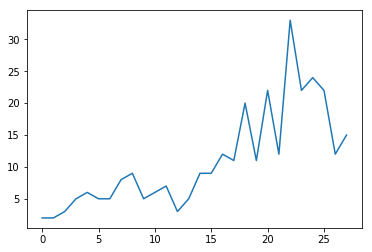

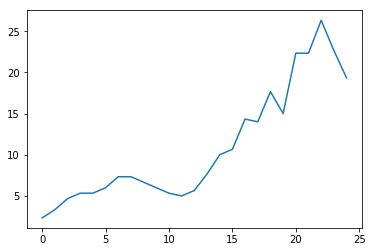

In [9]:
plt.plot(x)
plt.show()
    
y = ave(x,3)
plt.plot(y)
plt.show()



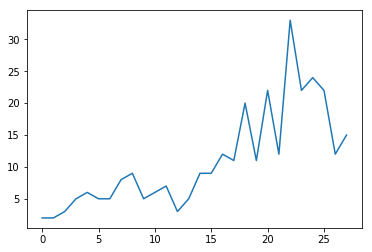

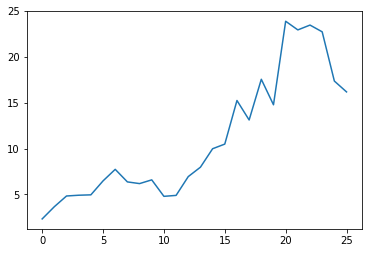

In [8]:

plt.plot(x)
plt.show()

y = ema(x,3)
plt.plot(y)
plt.show()